In [61]:
import pandas as pd
df=pd.read_csv("Downloads/kidney_disease.csv")

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [62]:
import numpy as np
import matplotlib.pyplot as plt
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [63]:
df['classification']=df['classification'].map({'ckd':1,"notckd":0})
df['rbc']=df['rbc'].map({'normal':1, 'abnormal':0})
df['pc']=df['pc'].map({'normal':1, 'abnormal':0})
df['pcc']=df['pcc'].map({'present':1, 'notpresent':0})
df['ba']=df['ba'].map({'present':1, 'notpresent':0})
df['htn']=df['htn'].map({'yes':1,'no':0})
df['dm']=df['dm'].map({'yes':1,'no':0})
df['cad']=df['cad'].map({'yes':1,'no':0})
df['pe']=df['pe'].map({'yes':1,'no':0})
df['ane']=df['ane'].map({'yes':1,'no':0})
df['appet']=df['appet'].map({'good':1,'poor':0})

df=df.dropna()
df['classification']=df['classification'].astype(int)

In [64]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
9,9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1
11,11,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1
14,14,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,1.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1
20,20,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,0.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1


In [68]:
x=df.iloc[:,0:25].values
y=df.iloc[:,25].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [71]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[35  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        13

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

1.0


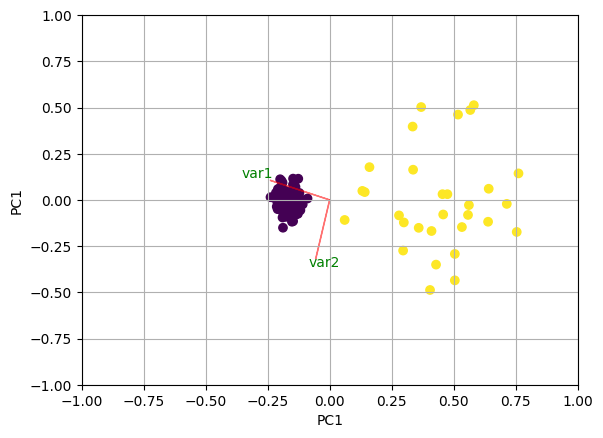

In [73]:
def biplot(score, coeff, y):
    xs=score[:,0]
    ys=score[:,1]
    n=coeff.shape[0]
    scalex=1.0/(xs.max()-xs.min())
    scaley=1.0/(ys.max()-ys.min())
    plt.scatter(xs*scalex, ys*scaley, c=y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r',alpha=0.5)
        plt.text(coeff[i,0]*1.5, coeff[i,1]*1.15, "var"+str(i+1),color='green')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(1))
    plt.grid()
biplot(X_train, pca.components_,y_train)
plt.show()

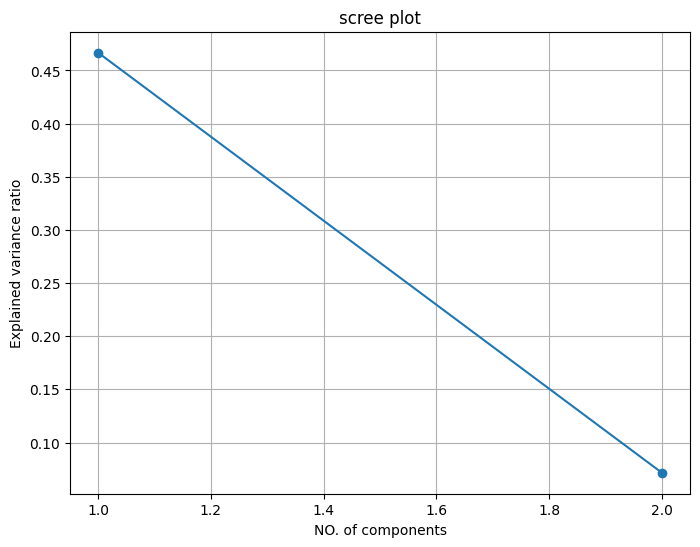

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel("NO. of components")
plt.ylabel('Explained variance ratio')
plt.title('scree plot')
plt.grid(True)
plt.show()